# Data Exploration

In [9]:
import pandas as pd

In [10]:
storage_path = "../../data/gold/monthly_registration_volume_gold.parquet"
df_gold = pd.read_parquet(storage_path, engine='pyarrow')

In [11]:
df_gold.shape

(107922, 27)

In [ ]:
# Exogenous values

In [12]:
df_gold.head()

,Date,ts_key,Value,Employment_Level,Employment_Level_Change,Employment_Level_Relative_Change,Employment_Level_YoY_Change,Employment_Level_YoY_Relative_Change,Employment_Level_MA_3,Employment_Level_MA_6,...,GDP,Lending_Rate,Lending_Rate_Change,Lending_Rate_Relative_Change,Lending_Rate_YoY_Change,Lending_Rate_YoY_Relative_Change,GR_price_with_tax_euro95,GR_price_with_tax_diesel,GR_price_with_tax_heGRing_oil,GR_price_with_tax_fuel_oil_1
0,2018-01-31,ALFA ROMEO_GIULIA_All_Wheel_Drive,54.0,32504413,-104455.0,-0.00320,796982.0,0.02514,3.264763e+07,3.264138e+07,...,104.34,0.25,0.0,0.0,0.0,0.0,1550.0,1326.0,1018.0,442.14
1,2018-02-28,ALFA ROMEO_GIULIA_All_Wheel_Drive,23.0,32550748,46335.0,0.00143,776950.0,0.02445,3.255468e+07,3.266715e+07,...,104.34,0.25,0.0,0.0,0.0,0.0,1550.0,1325.0,1010.0,424.16
2,2018-03-31,ALFA ROMEO_GIULIA_All_Wheel_Drive,85.0,32660492,109744.0,0.00337,730269.0,0.02287,3.257188e+07,3.265527e+07,...,102.81,0.25,0.0,0.0,0.0,0.0,1533.0,1309.0,991.0,431.53
3,2018-04-30,ALFA ROMEO_GIULIA_All_Wheel_Drive,51.0,32782173,121681.0,0.00373,768929.0,0.02402,3.266447e+07,3.265605e+07,...,102.81,0.25,0.0,0.0,0.0,0.0,1575.0,1348.0,1025.0,453.57
4,2018-05-31,ALFA ROMEO_GIULIA_All_Wheel_Drive,77.0,32857311,75138.0,0.00229,725968.0,0.02259,3.276666e+07,3.266067e+07,...,102.81,0.25,0.0,0.0,0.0,0.0,1647.0,1420.0,1025.0,520.12


In [31]:
df_gold['ts_key'].nunique()

1502

In [32]:
df_gold.columns

Index(['Date', 'ts_key', 'Value', 'Employment_Level',
       'Employment_Level_Change', 'Employment_Level_Relative_Change',
       'Employment_Level_YoY_Change', 'Employment_Level_YoY_Relative_Change',
       'Employment_Level_MA_3', 'Employment_Level_MA_6',
       'consumer_price_index', 'YoY_change', 'MoM_change', 'Deposit_Rate',
       'Deposit_Rate_Change', 'Deposit_Rate_Relative_Change',
       'Deposit_Rate_YoY_Change', 'GDP', 'Lending_Rate', 'Lending_Rate_Change',
       'Lending_Rate_Relative_Change', 'Lending_Rate_YoY_Change',
       'Lending_Rate_YoY_Relative_Change', 'GR_price_with_tax_euro95',
       'GR_price_with_tax_diesel', 'GR_price_with_tax_heGRing_oil',
       'GR_price_with_tax_fuel_oil_1'],
      dtype='object')

In [33]:
df_gold.head()

,Date,ts_key,Value,Employment_Level,Employment_Level_Change,Employment_Level_Relative_Change,Employment_Level_YoY_Change,Employment_Level_YoY_Relative_Change,Employment_Level_MA_3,Employment_Level_MA_6,...,GDP,Lending_Rate,Lending_Rate_Change,Lending_Rate_Relative_Change,Lending_Rate_YoY_Change,Lending_Rate_YoY_Relative_Change,GR_price_with_tax_euro95,GR_price_with_tax_diesel,GR_price_with_tax_heGRing_oil,GR_price_with_tax_fuel_oil_1
0,2018-01-31,ALFA ROMEO_GIULIA_All_Wheel_Drive,54.0,32504413,-104455.0,-0.00320,796982.0,0.02514,3.264763e+07,3.264138e+07,...,104.34,0.25,0.0,0.0,0.0,0.0,1550.0,1326.0,1018.0,442.14
1,2018-02-28,ALFA ROMEO_GIULIA_All_Wheel_Drive,23.0,32550748,46335.0,0.00143,776950.0,0.02445,3.255468e+07,3.266715e+07,...,104.34,0.25,0.0,0.0,0.0,0.0,1550.0,1325.0,1010.0,424.16
2,2018-03-31,ALFA ROMEO_GIULIA_All_Wheel_Drive,85.0,32660492,109744.0,0.00337,730269.0,0.02287,3.257188e+07,3.265527e+07,...,102.81,0.25,0.0,0.0,0.0,0.0,1533.0,1309.0,991.0,431.53
3,2018-04-30,ALFA ROMEO_GIULIA_All_Wheel_Drive,51.0,32782173,121681.0,0.00373,768929.0,0.02402,3.266447e+07,3.265605e+07,...,102.81,0.25,0.0,0.0,0.0,0.0,1575.0,1348.0,1025.0,453.57
4,2018-05-31,ALFA ROMEO_GIULIA_All_Wheel_Drive,77.0,32857311,75138.0,0.00229,725968.0,0.02259,3.276666e+07,3.266067e+07,...,102.81,0.25,0.0,0.0,0.0,0.0,1647.0,1420.0,1025.0,520.12


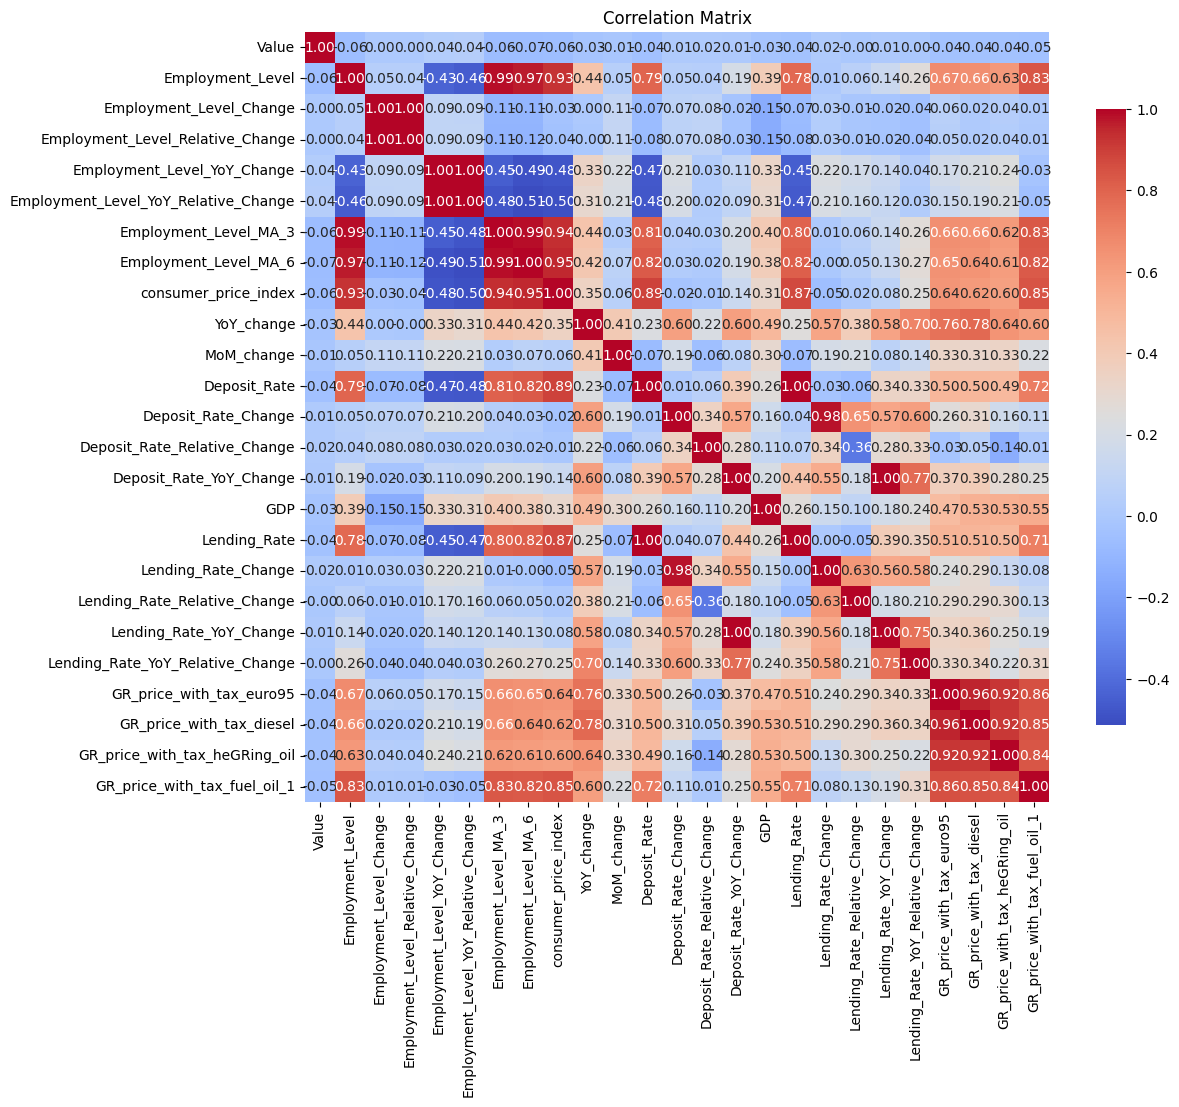

In [13]:
columns = ['Value', 'Employment_Level',
       'Employment_Level_Change', 'Employment_Level_Relative_Change',
       'Employment_Level_YoY_Change', 'Employment_Level_YoY_Relative_Change',
       'Employment_Level_MA_3', 'Employment_Level_MA_6',
       'consumer_price_index', 'YoY_change', 'MoM_change', 'Deposit_Rate',
       'Deposit_Rate_Change', 'Deposit_Rate_Relative_Change',
       'Deposit_Rate_YoY_Change', 'GDP', 'Lending_Rate', 'Lending_Rate_Change',
       'Lending_Rate_Relative_Change', 'Lending_Rate_YoY_Change',
       'Lending_Rate_YoY_Relative_Change', 'GR_price_with_tax_euro95',
       'GR_price_with_tax_diesel', 'GR_price_with_tax_heGRing_oil',
       'GR_price_with_tax_fuel_oil_1']

# Plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_gold[columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df_padded["ts_key_size"] = df_padded.groupby('ts_key')['ts_key'].transform('size')


In [2]:
storage_path = "../../data/processed/historical_kba_data.parquet"
df = pd.read_parquet(storage_path, engine='pyarrow')
df["ts_key_size"] = df.groupby('ts_key')['ts_key'].transform('size')

# FIlter ts_keys with at least 12 entries
df = df[df['ts_key_size'] >= 12].copy()

In [5]:
df.head()

,OEM,Model,drive_type,Value,Date,ts_key,ts_key_size
1745,ALFA ROMEO,GIULIA,All_Wheel_Drive,79.0,2022-10-31,ALFA ROMEO_GIULIA_All_Wheel_Drive,94
2094,ALFA ROMEO,GIULIA,Convertibles,0.0,2022-10-31,ALFA ROMEO_GIULIA_Convertibles,94
698,ALFA ROMEO,GIULIA,Diesel,9.0,2022-10-31,ALFA ROMEO_GIULIA_Diesel,94
1047,ALFA ROMEO,GIULIA,Electric_BEV,0.0,2022-10-31,ALFA ROMEO_GIULIA_Electric_BEV,94
1396,ALFA ROMEO,GIULIA,Hybrid,0.0,2022-10-31,ALFA ROMEO_GIULIA_Hybrid,94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231938 entries, 1745 to 356
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   OEM          231938 non-null  object        
 1   Model        231938 non-null  object        
 2   drive_type   231938 non-null  object        
 3   Value        231938 non-null  float64       
 4   Date         231938 non-null  datetime64[ns]
 5   ts_key       231938 non-null  object        
 6   ts_key_size  231938 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 14.2+ MB


In [11]:
df.drive_type.unique()

array(['All_Wheel_Drive', 'Convertibles', 'Diesel', 'Electric_BEV',
       'Hybrid', 'Petrol', 'Total'], dtype=object)

In [12]:
df.Date.describe()

count                           231938
mean     2022-01-24 05:13:28.571255808
min                2018-01-31 00:00:00
25%                2019-12-31 00:00:00
50%                2022-02-28 00:00:00
75%                2024-01-31 00:00:00
max                2025-10-31 00:00:00
Name: Date, dtype: object

In [13]:
df.groupby('ts_key').size().describe()

count    3745.000000
mean       61.932710
std        30.171771
min        12.000000
25%        33.000000
50%        66.000000
75%        94.000000
max        94.000000
dtype: float64

In [14]:
df.OEM.nunique()

64

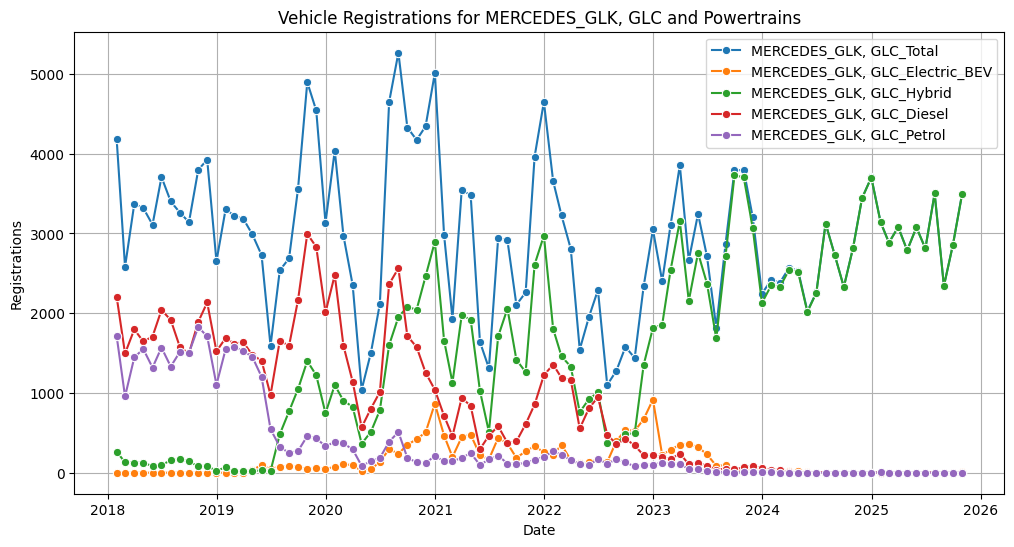

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

model = 'MERCEDES_GLK, GLC'

timeseries_key_list = [ f'{model}_Total', f'{model}_Electric_BEV',
                       f'{model}_Hybrid', f'{model}_Diesel', f'{model}_Petrol']

time_col = 'Date'

plt.figure(figsize=(12, 6))

for ts_key in timeseries_key_list:
    df_subset = df[df['ts_key'] == ts_key].copy()
    if not df_subset.empty:
        df_subset = df_subset.sort_values(by=time_col)
        sns.lineplot(data=df_subset, x=time_col, y='Value', marker='o', label=ts_key)
    else:
        print(f"No data found for {ts_key}")

plt.title(f'Vehicle Registrations for {model} and Powertrains')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.legend()
plt.grid(True)
plt.show()



In [17]:
# Check all ts_keys containing values for "VW_GOLF"
df[df['ts_key'].str.contains("GLA")]['ts_key'].unique()

array(['MERCEDES_GLA_All_Wheel_Drive', 'MERCEDES_GLA_Convertibles',
       'MERCEDES_GLA_Diesel', 'MERCEDES_GLA_Electric_BEV',
       'MERCEDES_GLA_Hybrid', 'MERCEDES_GLA_Petrol', 'MERCEDES_GLA_Total'],
      dtype=object)

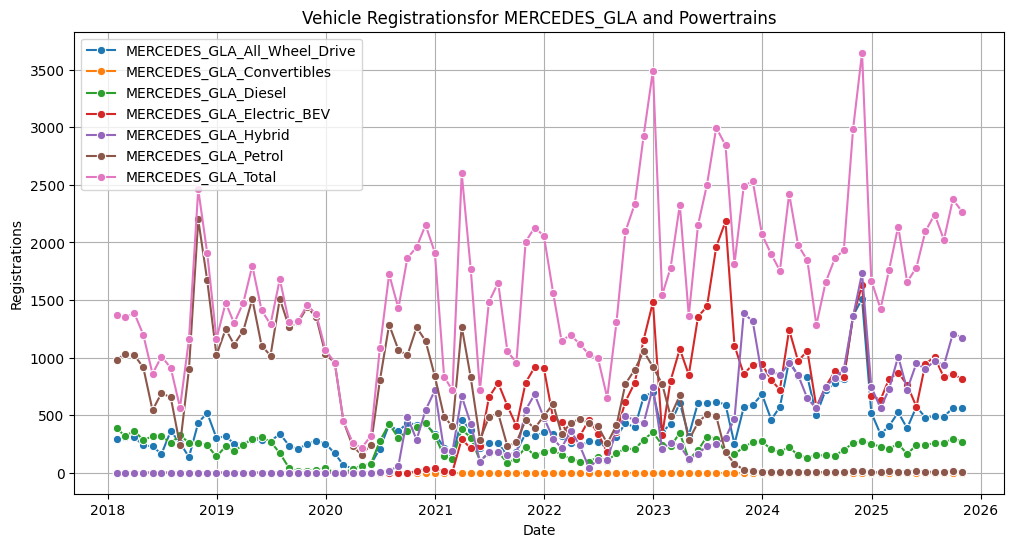

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

model = 'MERCEDES_GLA'

timeseries_key_list = df[df['ts_key'].str.contains(model)]['ts_key'].unique()

time_col = 'Date'

plt.figure(figsize=(12, 6))

for ts_key in timeseries_key_list:
    df_subset = df[df['ts_key'] == ts_key].copy()
    if not df_subset.empty:
        df_subset = df_subset.sort_values(by=time_col)
        sns.lineplot(data=df_subset, x=time_col, y='Value', marker='o', label=ts_key)
    else:
        print(f"No data found for {ts_key}")

plt.title(f'Vehicle Registrationsfor {model} and Powertrains')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.legend()
plt.grid(True)
plt.show()



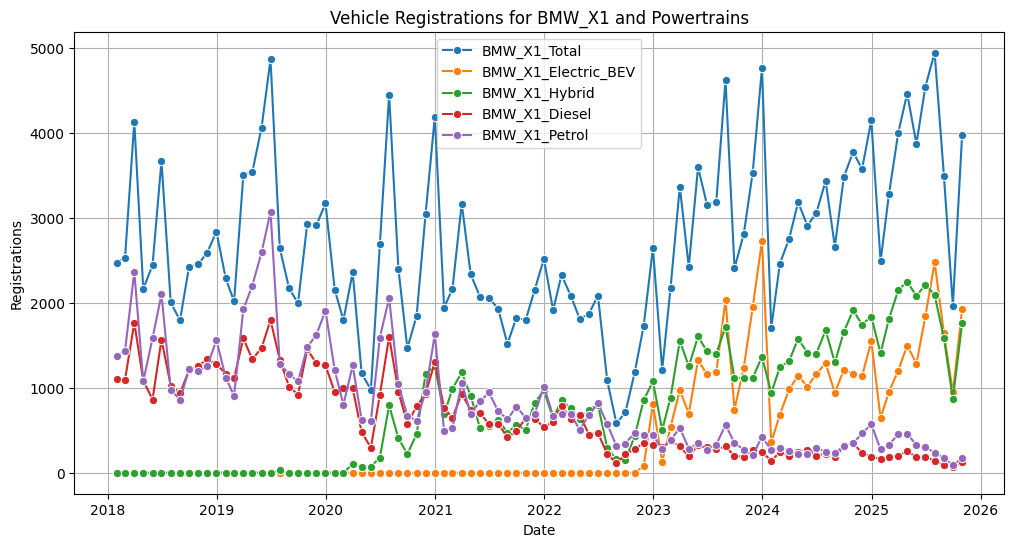

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

model = 'BMW_X1'

timeseries_key_list = [f'{model}_Total', f'{model}_Electric_BEV', 
                       f'{model}_Hybrid', f'{model}_Diesel', f'{model}_Petrol']

time_col = 'Date'

plt.figure(figsize=(12, 6))

for ts_key in timeseries_key_list:
    df_subset = df[df['ts_key'] == ts_key].copy()
    if not df_subset.empty:
        df_subset = df_subset.sort_values(by=time_col)
        sns.lineplot(data=df_subset, x=time_col, y='Value', marker='o', label=ts_key)
    else:
        print(f"No data found for {ts_key}")

plt.title(f'Vehicle Registrations for {model} and Powertrains')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.legend()
plt.grid(True)
plt.show()



In [61]:
df_subset

,OEM,Model,drive_type,Value,Date,ts_key,ts_key_size
358,BMW,X1,Petrol,1372.0,2018-01-31,BMW_X1_Petrol,94
364,BMW,X1,Petrol,1435.0,2018-02-28,BMW_X1_Petrol,94
376,BMW,X1,Petrol,2365.0,2018-03-31,BMW_X1_Petrol,94
383,BMW,X1,Petrol,1079.0,2018-04-30,BMW_X1_Petrol,94
385,BMW,X1,Petrol,1582.0,2018-05-31,BMW_X1_Petrol,94
...,...,...,...,...,...,...,...
481,BMW,X1,Petrol,300.0,2025-06-30,BMW_X1_Petrol,94
488,BMW,X1,Petrol,236.0,2025-07-31,BMW_X1_Petrol,94
494,BMW,X1,Petrol,176.0,2025-08-31,BMW_X1_Petrol,94
504,BMW,X1,Petrol,91.0,2025-09-30,BMW_X1_Petrol,94
